### Startup Profit Prediction

#### Multiple Linear Regression on Startups Profits

##### Load Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load the dataset

In [2]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### Summarize the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### Descriptive Summary

In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#### Check null values

In [5]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### Check for any duplicate values

In [6]:
df.duplicated().sum()

0

#### Check the outliers

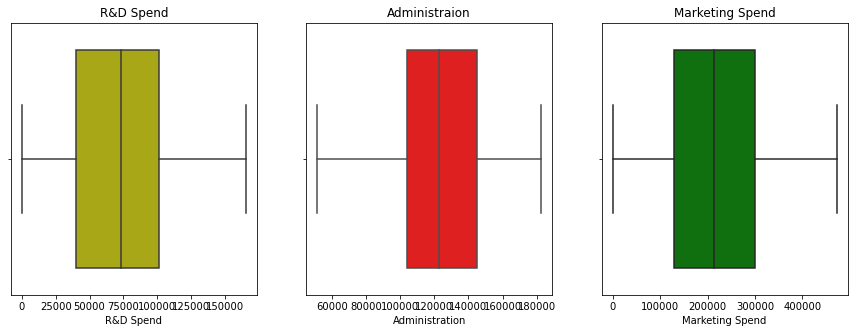

In [7]:
fig, axes=plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.boxplot(df['R&D Spend'], color='y')
plt.title('R&D Spend')
plt.subplot(132)
sns.boxplot(df['Administration'], color='r')
plt.title('Administraion')
plt.subplot(133)
sns.boxplot(df['Marketing Spend'], color='g')
plt.title('Marketing Spend')
plt.show()

Observation:
    No outliers are there.

#### Now, check the distributions of all three independent variables:

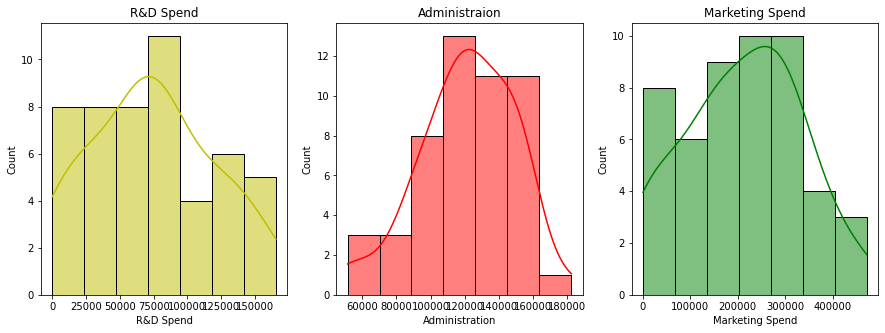

In [8]:
fig, axes= plt.subplots(1,3, figsize=(15,5))
plt.subplot(131)
sns.histplot(df['R&D Spend'], kde=True, color='y')
plt.title('R&D Spend')
plt.subplot(132)
sns.histplot(df['Administration'], kde=True, color='r')
plt.title('Administraion')
plt.subplot(133)
sns.histplot(df['Marketing Spend'], kde=True, color='g')
plt.title('Marketing Spend')
plt.show()

Observations:

1. Administration data is Normally Distributed.
2. R&D Spend and Marketing Spend are almost Right/Positive Skewed.

#### Check the relation of each independent feature with dependent feature-

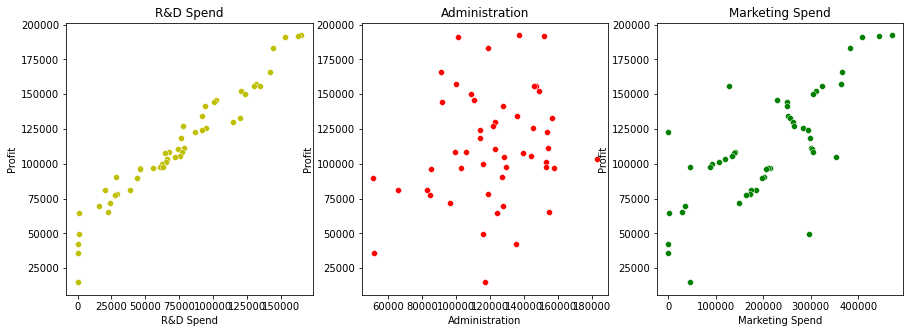

In [9]:
fig, axes= plt.subplots(1,3, figsize=(15,5))
plt.subplot(131)
sns.scatterplot(x=df['R&D Spend'], y=df['Profit'], color='y')
plt.title('R&D Spend')
plt.subplot(132)
sns.scatterplot(x=df['Administration'], y=df['Profit'], color='r')
plt.title('Administration')
plt.subplot(133)
sns.scatterplot(x=df['Marketing Spend'], y=df['Profit'], color='g')
plt.title('Marketing Spend')
plt.show()

Observations:

1. R&D Spend is completely Linear.
2. Marketing Spend is also Linear.
3. Administraion Spend is not Linear.

Let's convert State Name into numericals

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label=LabelEncoder()

In [12]:
df['State_Num']=label.fit_transform(df[['State']])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_Num
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


#### Check corelation between Features:

<AxesSubplot:>

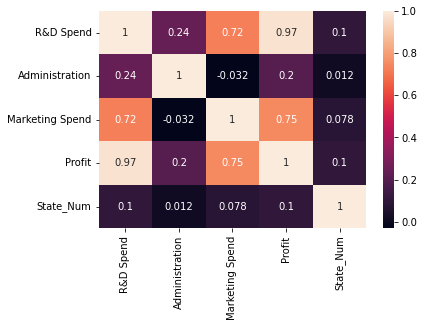

In [13]:
sns.heatmap(df.corr(method='pearson'), annot=True)

Observations:

1. R&D Spend and Marketing Spend's will play crucial role in our model training as they have 0.97 and 0.75 Correlation's with Profit's.
2. But Administration has a Correlation of only 0.2. So we even if don't consider that feature, there won't be any problem.
3. States also don't have much significance, as it has only 0.1 Correlation which is almost Zero. So we can Remove that Feature.

In [14]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_Num
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.104685
Administration,0.241955,1.000000,-0.032154,0.200717,0.011847
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.077670
Profit,0.972900,0.200717,0.747766,1.000000,0.101796
State_Num,0.104685,0.011847,0.077670,0.101796,1.000000


In [15]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_Num
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


#### Drop Administraion and States columns-

In [16]:
df.drop(["Administration","State","State_Num"], axis=1, inplace=True)

In [17]:
df.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


Split the data

In [18]:
x=df.drop("Profit", axis=1)

In [19]:
x.head()

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


In [20]:
y=df['Profit']

In [21]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40, 2), (10, 2), (40,), (10,))

#### Define the Model:

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model= LinearRegression()

In [27]:
model

LinearRegression()

#### Fit the Model:

In [28]:
model.fit(x_train, y_train)

LinearRegression()

#### Predict the test Data

In [29]:
y_pred= model.predict(x_test)
y_pred

array([ 82794.28537479, 102721.78522075,  97604.15789059,  89700.55382721,
       161072.93383974,  98409.42839618,  65265.9560977 , 163497.15952849,
       103252.59126031, 112767.8216177 ])

#### Check the cost function with respect to predictions

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
d={}
d['mse']=mean_squared_error(y_test,y_pred)
d['mae']=mean_absolute_error(y_test, y_pred)
d['rmse']=np.sqrt(mean_squared_error(y_test, y_pred))

In [32]:
d

{'mse': 16103015.02470561, 'mae': 3113.871243690657, 'rmse': 4012.856217796198}

#### Check r^2 and Adjusted r^2 Score

In [33]:
from sklearn.metrics import r2_score

In [34]:
d1={}
r2=r2_score(y_test, y_pred)
d1["r2"]=r2

In [35]:
d1

{'r2': 0.9788697455753781}

R^2= 1-(SS(res) / SS(tot))             # R squaredd       #res=resudals,  tot=total, SS=Sum of squared

R^2(Adj)= 1-[(1-R^2)(n-1) / n-k-1]      # R squared Adjusted

In [36]:
n_1= len(x_test)-1            # n_1 = (n-1)
n_k_1= len(x_test)-len(x.columns)-1      # n_k_1 = n-k-1

adjusted_r2= 1-((1-r2) * n_1 / n_k_1)


In [37]:
d1['adjusted_r2']= adjusted_r2

In [38]:
d1

{'r2': 0.9788697455753781, 'adjusted_r2': 0.9728325300254861}

#### Function to predict given input:

In [39]:
df.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [40]:
def Profit_predict():
    a=float(input("Enter R&D Spend:"))
    b=float(input("Enter Marketing Spend:"))
    res=model.predict([[a,b]])
    print("Your Profit Might be:", res)

In [42]:
Profit_predict()

Enter R&D Spend:100000
Enter Marketing Spend:120000
Your Profit Might be: [130645.34346703]


In [ ]:
    #END#